# Simulación del movimiento de dos masas puntuales colgadas a la misma altura de cuerdas inextensibles y sin masa unidas por un resorte en sus extremos 
_Camilo Murcia 2191322_  
_Michel Calderón 2210710_

**Este código se hizo parcialmente usando chatGPT**

In [1]:
import numpy as np #cálculo de datos
import pandas as pd #trabajo con los datos obtenidos
import matplotlib.pyplot as plt #graficación y animación de resultados
plt.rcParams['text.usetex'] = False
import matplotlib.animation as animation
import os #guardar los archivos en el pc de manera automática


In [4]:
#Ecuaciones de movimiento con parámetros de cada masa y longitud de cada cuerda de la que cuelgan
def derivs(t, y, m1, m2, l1, l2, g, k):
    theta, omega_theta, phi, omega_phi = y

    # Ecuaciones diferenciales
    d2_theta = (g / l1) * np.sin(theta) - (k*l2 / m1*l1) * np.sin(phi - theta)
    d2_phi = (g / l2) * np.sin(phi) + (k*l1 / m2*l2) * np.sin(phi - theta)

    return [omega_theta, d2_theta, omega_phi, d2_phi]

#el clásico RK4
def runge_kutta_4(t, y0, m1, m2, l1, l2, g, k, dt):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(1, n):
        k1 = np.array(derivs(t[i-1], y[i-1], m1, m2, l1, l2, g, k))
        k2 = np.array(derivs(t[i-1] + dt/2, y[i-1] + dt/2 * k1, m1, m2, l1, l2, g, k))
        k3 = np.array(derivs(t[i-1] + dt/2, y[i-1] + dt/2 * k2, m1, m2, l1, l2, g, k))
        k4 = np.array(derivs(t[i-1] + dt, y[i-1] + dt * k3, m1, m2, l1, l2, g, k))

        y[i] = y[i-1] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

    return y

#para poder ver las posiciones de la masa en el espacio (x,y)
def calculate_positions(theta, phi, l1, l2, a):
    # Posición de la primera masa
    x1 = l1 * np.sin(theta)
    y1 = -l1 * np.cos(theta)

    # Posición de la segunda masa
    x2 = a + l2 * np.sin(phi)
    y2 = -l2 * np.cos(phi)

    return x1, y1, x2, y2

In [15]:
np.pi*0.25

0.7853981633974483

In [16]:
# Parámetros
m1 = 2.0       # Masa de cada péndulo
m2 = 20       # Masa de cada péndulo
l1 = 1       # Longitud de cada varilla
l2 = 1       # Longitud de cada varilla
a = l1+l2+0.1
g = -9.81      # Gravedad
k = np.pi  # Constante del resorte

# Condiciones iniciales
theta_0 = np.pi*(0.2)
omega_theta_0 = -0.0
phi_0 = np.pi*(0.25)
omega_phi_0 = 0.0
y0 = [theta_0, omega_theta_0, phi_0, omega_phi_0]

# Tiempo
t_start = 0
t_end = 20
dt = 0.01
t = np.arange(t_start, t_end, dt)

In [18]:
# Resolver el sistema
solution = runge_kutta_4(t, y0, m1, m2, l1, l2, g, k, dt)
theta = solution[:,0]
omega_theta = solution[:,1]
phi = solution[:,2]
omega_phi = solution[:,3]

data = {'Time': t, 'Theta': theta, "OmegaTheta": omega_theta , 'Phi': phi, "OmegaPhi": omega_phi}
df = pd.DataFrame(data)
df.to_csv('pendulum_data.csv', index=False)

In [20]:
# Leer los datos desde el archivo CSV
df = pd.read_csv('pendulum_data.csv')
t = df['Time'].values
theta = df['Theta'].values
omegatheta = df['OmegaTheta'].values
phi = df['Phi'].values
omegaphi = df['OmegaPhi'].values

# Calcular posiciones
x1, y1, x2, y2 = calculate_positions(theta, phi, l1, l2, a)

nombre_archivo = f'graficos pendulum_motion_k_{round(k,3)}_theta_{round(theta_0,3)}_omega_theta_0_{round(omega_theta_0,3)}_phi_{round(phi_0,4)}_omega_phi_0_{round(omega_phi_0,3)}'

if not os.path.exists(nombre_archivo):
    os.makedirs(nombre_archivo)

In [22]:
# Condiciones iniciales
initial_theta = theta[0]
initial_phi = phi[0]
Delta = abs(initial_theta-initial_phi)
formDelta = f"{Delta:.2e}"

In [ ]:
formDelta

In [ ]:
nombre_archivo

In [24]:
# Crear y guardar gráficos independientes

# Gráfico de theta vs t
plt.figure(figsize=(7, 5))
plt.plot(t, theta, label='θ(t)', color='g')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo θ [rad]')
plt.title('θ vs t')
plt.grid()
plt.legend()
plt.savefig(f'{nombre_archivo}/theta_vs_t.png')
plt.close()

# Gráfico
plt.figure(figsize=(7, 5))
plt.plot(theta, omegatheta, color='g')
plt.xlabel('Ángulo θ [rad]')
plt.ylabel(r'Velocidad angular $\omega_{\theta}$')
plt.title(r"$\theta$ vs $\omega_{\theta}$")
plt.grid()
#plt.legend()
plt.savefig(f'{nombre_archivo}/Theta_vs_OmegaTheta.png')
plt.close()

# Gráfico de phi vs t
plt.figure(figsize=(7, 5))
plt.plot(t, phi, label=r'$\phi(t)$', color='r')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'Ángulo $\phi$ [rad]')
plt.title(r'$\phi$ vs t')
plt.grid()
plt.legend()
plt.savefig(f'{nombre_archivo}/phi_vs_t.png')
plt.close()

# Gráfico
plt.figure(figsize=(7, 5))
plt.plot(phi, omegaphi, color='r')
plt.xlabel(r'Ángulo $\phi$ [rad]')
plt.ylabel(r'Velocidad angular $\omega_{\phi}$')
plt.title(r"$\phi$ vs $\omega_{\phi}$")
plt.grid()
#plt.legend()
plt.savefig(f'{nombre_archivo}/phi_vs_omegaphi.png')
plt.close()

# Gráfico de θ vs φ
plt.figure(figsize=(7, 5))
plt.plot(theta, phi, label=r'θ vs $\phi$', color='b')
plt.xlabel('Ángulo θ [rad]')
plt.ylabel(r'Ángulo $\phi$ [rad]')
plt.title(r'θ vs $\phi$')
plt.grid()
plt.legend()
plt.savefig(f'{nombre_archivo}/theta_vs_phi.png')
plt.close()

# Gráfico de θ y φ
plt.figure(figsize=(7, 5))
plt.plot(t, phi, label=r'$\phi$', color='r')
plt.plot(t, theta, label='θ', color='g')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title(r'θ y $\phi$')
plt.grid()
plt.legend()
plt.savefig(f'{nombre_archivo}/theta_y_phi.png')
plt.close()

## Animación

La animación se ha guardado como 'pendulum_motion.mp4'


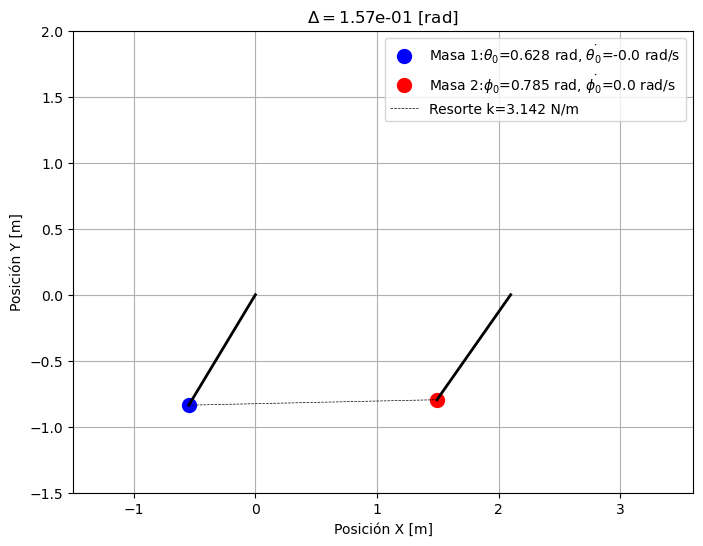

In [26]:
initial_theta = theta[0]
initial_phi = phi[0]

# Configuración de la animación
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-l1-0.5, l1+a+0.5)
ax.set_ylim(-l1-0.5, l1+1)
ax.set_xlabel('Posición X [m]')
ax.set_ylabel('Posición Y [m]')
ax.set_title('Movimiento de los Péndulos')

# Configurar líneas y puntos
line1, = ax.plot([], [], 'bo', markersize=10, label='Masa 1:' r'$\theta_0$='f"{round(initial_theta,3)} rad, " r"$\dot{\theta_0}$=" f"{round(omega_theta_0,3)} rad/s")  # Masa 1
line2, = ax.plot([], [], 'ro', markersize=10, label="Masa 2:" r'$\phi_0$='f"{round(initial_phi,3)} rad, " r"$\dot{\phi_0}$=" f"{round(omega_phi_0,3)} rad/s")  # Masa 2
line3, = ax.plot([], [], 'k--', linewidth=0.5, label=f'Resorte k={round(k,3)} N/m')  # Conexión entre masas
bar1, = ax.plot([], [], 'k-', linewidth=2)  # Barra del primer péndulo
bar2, = ax.plot([], [], 'k-', linewidth=2)  # Barra del segundo péndulo

ax.set_title(r'$\Delta=$' f'{formDelta} [rad]')
ax.legend()
ax.grid()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    bar1.set_data([], [])
    bar2.set_data([], [])
    return line1, line2, line3, bar1, bar2

def animate(i):
    line1.set_data([x1[i]], [y1[i]])
    line2.set_data([x2[i]], [y2[i]])
    line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    
    # Actualizar barras de los péndulos
    bar1.set_data([0, x1[i]], [0, y1[i]])
    bar2.set_data([a, x2[i]], [0, y2[i]])
    
    return line1, line2, line3, bar1, bar2

# Crear la animación
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=20, blit=True)

# Guardar la animación como un archivo MP4
ani.save(f'{nombre_archivo}/{nombre_archivo}.mp4', writer='ffmpeg', fps=30)

print("La animación se ha guardado como 'pendulum_motion.mp4'")


## Parte de fouriera
Esta parte no se ha desarrollado todavía

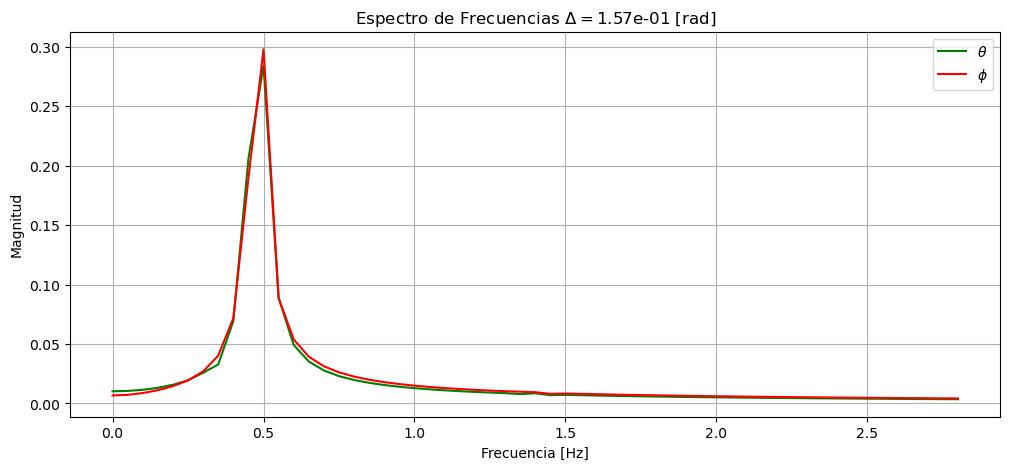

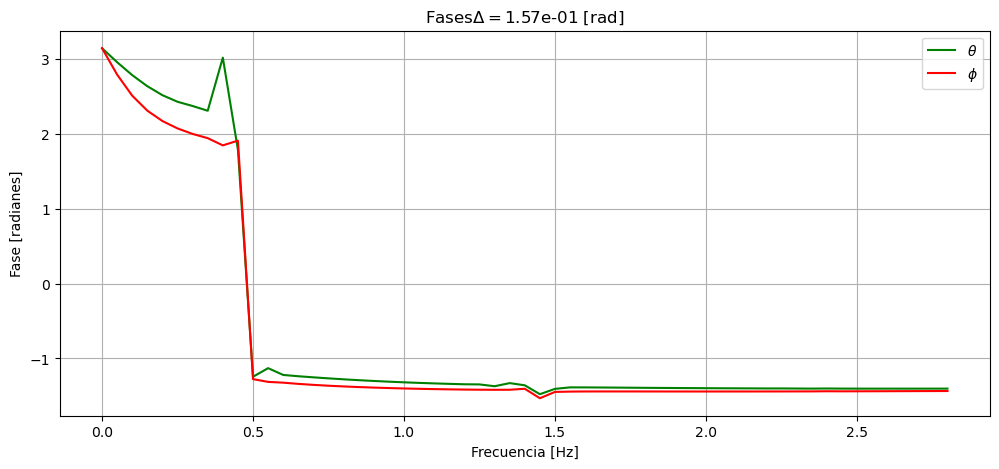

In [30]:
# Parámetros del sistema
dt = t[1] - t[0]  # Suponiendo que el tiempo es equidistante
N = len(t)
Fs = 1 / dt  # Frecuencia de muestreo

# Transformada de Fourier
def fourier_transform(signal):
    fft_values = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), dt)
    return fft_values, fft_freq

# Aplicar la Transformada de Fourier a cada ángulo
theta_fft, theta_freq = fourier_transform(theta)
phi_fft, phi_freq = fourier_transform(phi)

# Magnitud y fase de las componentes
theta_magnitude = (np.abs(theta_fft)) / N  # Normalización por el número de muestras
phi_magnitude = (np.abs(phi_fft)) / N  # Normalización por el número de muestras
theta_phase = (np.angle(theta_fft))
phi_phase = (np.angle(phi_fft))

d=35

# Espectro de frecuencia para theta
plt.figure(figsize=(12, 5))
plt.plot(theta_freq[:N//d], theta_magnitude[:N//d], label = r'$\theta$', color='g')
plt.plot(phi_freq[:N//d], phi_magnitude[:N//d], label = r'$\phi$', color='r')
plt.title(r'Espectro de Frecuencias $\Delta=$' f'{formDelta} [rad]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()
plt.savefig(f'{nombre_archivo}/fft_magnitude.png')

# Espectro de fase para theta
plt.figure(figsize=(12, 5))
plt.plot(theta_freq[:N//d], theta_phase[:N//d], label = r'$\theta$', color='g')
plt.plot(phi_freq[:N//d], phi_phase[:N//d], label = r'$\phi$', color='r')
plt.title('Fases' r'$\Delta=$' f'{formDelta} [rad]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [radianes]')
plt.legend()
plt.grid()
#plt.savefig(f'{nombre_archivo}/fft_fase.png')

#plt.tight_layout()
#plt.show()


## algo de $\Latex$
L = \frac{1}{2}m_1(l_1\dot{\theta})^2 +\frac{1}{2}m_2(l_2\dot{\phi})^2 -m_1gl_1\cos(\theta) -m_2gl_2\cos(\phi) -\frac{k}{2}(l_1^2-l_2^2) + kl_2l_1\cos(\phi-\theta))


In [ ]:
# modos característicos

from scipy.signal import find_peaks
def find_modes(freq, magnitude):
    peaks, _ = find_peaks(magnitude)
    return freq[peaks], magnitude[peaks]

# Encontrar modos para theta
theta_modes_freq, theta_modes_mag = find_modes(theta_freq, theta_magnitude)

# Encontrar modos para phi
phi_modes_freq, phi_modes_mag = find_modes(phi_freq, phi_magnitude)

# Mostrar los modos característicos
print("Modos Característicos para θ(t):")
for f, m in zip(theta_modes_freq, theta_modes_mag):
    print(f"Frecuencia: {f:.2f} Hz, Magnitud: {m:.2f}")

print("\nModos Característicos para φ(t):")
for f, m in zip(phi_modes_freq, phi_modes_mag):
    print(f"Frecuencia: {f:.2f} Hz, Magnitud: {m:.2f}")


In [ ]:
#dice que con esto se ven los resultados canteriores
python fourier_analysis.py
